In this notebook, pick out some of the best performing iterative models from sweep results at each noise levels and look at how the number of iterations relate to smoothing factors.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import wandb
import numpy as np
import seaborn as sns
wandb.login()

True

In [49]:
iterative_sweeps = [
"8b5samb8", # noise 0
"4013a4eg", # noise 1 
"y4prhi94", # noise 2
"el1u1dr4", # noise 3
"4mlrggda", # noise 4
"qspwm421", # noise 5
"36x0z5q4", # noise 6
"823rcbn7"  # noise 7  
]

In [70]:
sweep_id = "el1u1dr4"
api = wandb.Api()
sweep_path = "sizhuang/IterativeMethods/" + sweep_id
sweep = api.sweep(sweep_path)
sweep_runs = sweep.runs
num_runs = len(sweep_runs)

test_acc_list, num_iter_list, smooth_fac_list = [], [], []
for run in sweep_runs: 
    # .summary contains the output keys/values 
    #  for metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    test_acc_list.append(run.summary._json_dict["test_accuracy"])

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    num_iter_list.append(run.config["num_iter_layers"])

    # .name is the human-readable name of the run.
    smooth_fac_list.append(run.config["smooth_fac"])
runs_df = pd.DataFrame({
            "test accuracy": test_acc_list,
            "number of iterations": num_iter_list,
            "smooth factors": smooth_fac_list
        })


In [72]:

sweep_id = "el1u1dr4"
api = wandb.Api()
sweep_path = "sizhuang/IterativeMethods/" + sweep_id
sweep = api.sweep(sweep_path)
sweep_runs = sweep.runs
num_runs = len(sweep_runs)

test_acc_list, num_iter_list, smooth_fac_list = [], [], []
for run in sweep_runs: 
    # .summary contains the output keys/values 
    #  for metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    test_acc_list.append(run.summary._json_dict["test_accuracy"])

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    num_iter_list.append(run.config["num_iter_layers"])

    # .name is the human-readable name of the run.
    smooth_fac_list.append(run.config["smooth_fac"])
runs_df = pd.DataFrame({
            "test accuracy": test_acc_list,
            "number of iterations": num_iter_list,
            "smooth factors": smooth_fac_list
        })
dt = runs_df.sort_values(by=["test accuracy"], ascending=False)[:10]




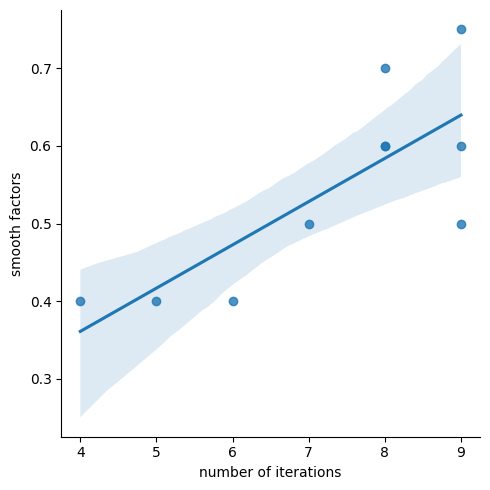

In [73]:

sns.lmplot(x="number of iterations",
           y="smooth factors",
           data=dt,
           order=1)